In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
!pip install -q -U tf-hub-nightly

In [4]:
import tensorflow_hub as hub

In [5]:
from tensorflow.keras import layers

In [6]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [7]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [8]:
import numpy as np
import PIL.Image as Image

319488/314509 [==============================] - 0s 1us/step


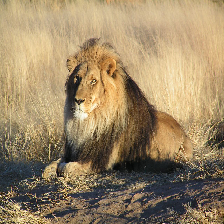

In [9]:
myimg = tf.keras.utils.get_file('image.jpg','https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg')
myimg = Image.open(myimg).resize(IMAGE_SHAPE)
myimg

In [11]:
myimg = np.array(myimg)/255.0
myimg.shape

(224, 224, 3)

In [12]:
result = classifier.predict(myimg[np.newaxis, ...])
result.shape

(1, 1001)

In [13]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

292

In [17]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

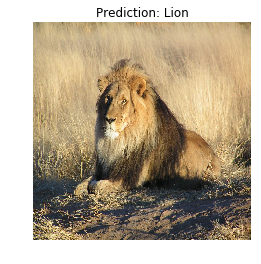

In [18]:
plt.imshow(myimg)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())